In [1]:
#Shishir Khanal
#July 11, 2025
#Multivariate RNN

In [2]:
#Model is black box
#Input shape in LSTM layer changes to reflect 2-D structure
#Final dense layer should have a neuron per feature/variable

In [3]:
import pandas as pd
import numpy as np
#matplotlib inline
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('energydata_complete.csv',index_col='date',infer_datetime_format=True)

In [5]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 non-null fl

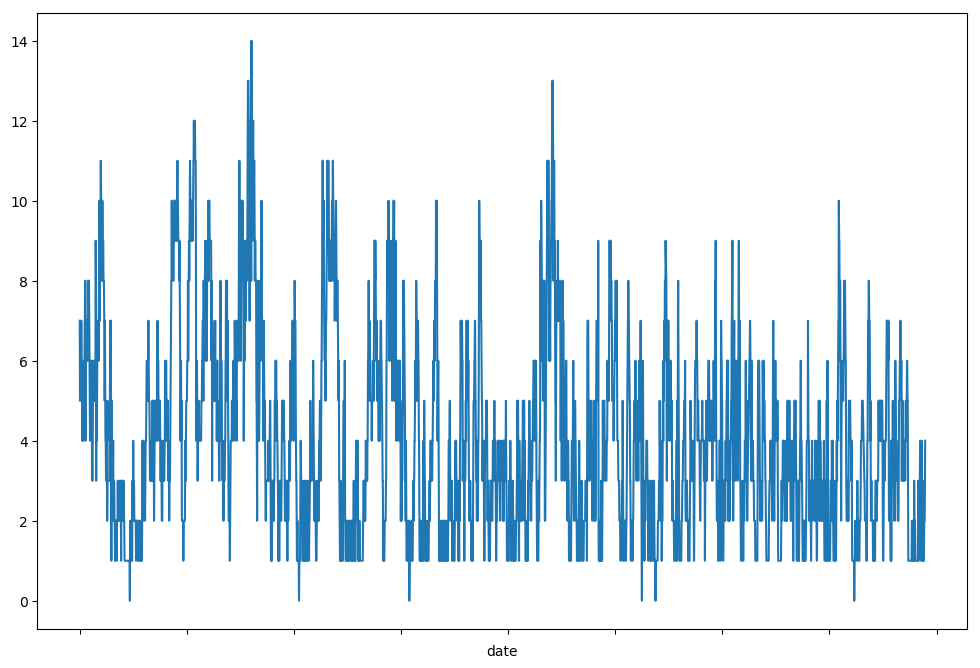

In [8]:
df['Windspeed'].plot(figsize=(12,8))

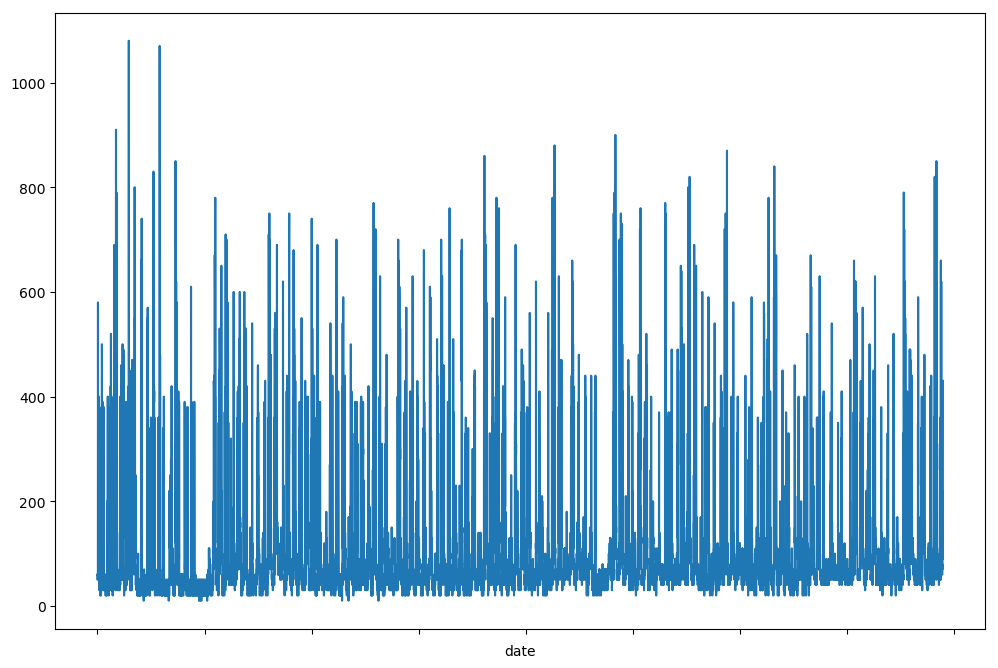

In [9]:
df['Appliances'].plot(figsize=(12,8))

In [11]:
df = df.loc['2016-05-01':]

In [12]:
df = df.round(2)

In [13]:
len(df)

3853

In [14]:
#How many rows per day? 1ce /10 min
24*60/10

144.0

In [15]:
test_days = 2

In [16]:
test_ind = test_days * 144

In [17]:
test_ind

288

In [18]:
#training set is starting index to everything except last 288 index
train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [19]:
#Scale Data
from sklearn.preprocessing import MinMaxScaler

/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(train)

/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [22]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [23]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [24]:
#define generator
length = 144 #length of output sequences in # of timesteps
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [25]:
len(scaled_train)

3565

In [26]:
len(generator)

3421

In [27]:
X,y = generator[0]

In [28]:
print(f'Given the array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the array: 
[0.03896104 0.         0.13798978 ... 0.14319527 0.75185111 0.75185111]
Predict this y: 
 [[0.03896104 0.         0.30834753 0.29439421 0.16038492 0.49182278
  0.0140056  0.36627907 0.24142857 0.24364791 0.12650602 0.36276002
  0.12       0.28205572 0.06169297 0.15759185 0.34582624 0.39585974
  0.09259259 0.39649608 0.18852459 0.96052632 0.59210526 0.1
  0.58333333 0.13609467 0.4576746  0.4576746 ]]


In [29]:
#Create a Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [30]:
scaled_train.shape

(3565, 28)

In [31]:
model = Sequential()

#Simple RNN Layer
model.add(LSTM(25,input_shape=(length,scaled_train.shape[1]))) #scaled_train.shape[1] --> # of features you are considering

#Final Prediction
model.add(Dense(scaled_train.shape[1]))

model.compile(optimizer='adam', loss='mse')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 25)                5400      
_________________________________________________________________
dense (Dense)                (None, 28)                728       
Total params: 6,128
Trainable params: 6,128
Non-trainable params: 0
_________________________________________________________________


In [33]:
#EarlyStopping

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=batch_size)

In [34]:
model.fit_generator(generator,epochs=2,validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/2
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2025-07-11 12:37:52.696820: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2025-07-11 12:37:52.701624: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2994595000 Hz
2025-07-11 12:37:52.702295: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5a09e2e93250 executing computations on platform Host. Devices:
2025-07-11 12:37:52.702317: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2025-07-11 12:37:52.742839: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not via TF_XLA_FLAGS) 

3421/3421 [==============================] - 246s 72ms/step - loss: 0.0159 - val_loss: 0.0151
Epoch 2/2
3421/3421 [==============================] - 245s 72ms/step - loss: 0.0091 - val_loss: 0.0111


In [37]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

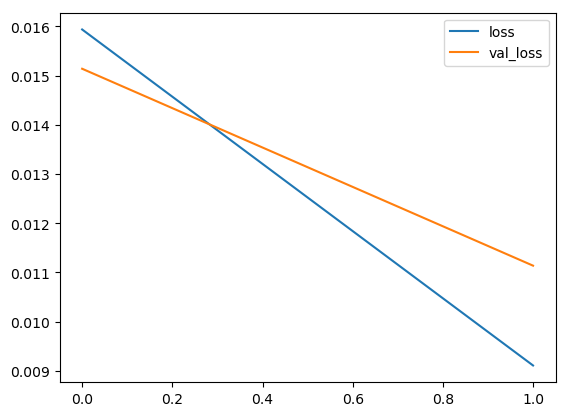

In [38]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [39]:
#Evaluate on Test Data

In [40]:
first_eval_batch = scaled_train[-length:]
first_eval_batch

array([[0.1038961 , 0.        , 0.72231687, ..., 0.53550296, 0.15909546,
        0.15909546],
       [0.11688312, 0.        , 0.73424191, ..., 0.52662722, 0.40344207,
        0.40344207],
       [0.11688312, 0.        , 0.73424191, ..., 0.51775148, 0.20452271,
        0.20452271],
       ...,
       [0.18181818, 0.        , 0.70017036, ..., 0.50118343, 0.33340004,
        0.33340004],
       [0.09090909, 0.        , 0.70017036, ..., 0.51952663, 0.78747248,
        0.78747248],
       [0.1038961 , 0.        , 0.70017036, ..., 0.53846154, 0.77286372,
        0.77286372]])

In [41]:
first_eval_batch = first_eval_batch.reshape((1,length,scaled_train.shape[1]))

In [42]:
model.predict(first_eval_batch)

array([[0.10837607, 0.09111609, 0.65455556, 0.40479192, 0.5866854 ,
        0.42972568, 0.37248322, 0.46560454, 0.6702662 , 0.3567739 ,
        0.36004597, 0.36741748, 0.666573  , 0.0272851 , 0.6557871 ,
        0.3804141 , 0.49129233, 0.3654015 , 0.59379715, 0.42770013,
        0.6439141 , 0.5072469 , 0.39335454, 0.22965711, 0.5908119 ,
        0.52757347, 0.44564122, 0.44221953]], dtype=float32)

In [43]:
scaled_test[0]

array([0.19480519, 0.        , 0.70017036, 0.3920434 , 0.53007217,
       0.41064526, 0.40616246, 0.41913319, 0.72714286, 0.4115245 ,
       0.30722892, 0.36445121, 0.66777778, 0.        , 0.61119082,
       0.39840637, 0.51618399, 0.32953105, 0.53703704, 0.34024896,
       0.6057377 , 0.52631579, 0.41881579, 0.2       , 0.55283333,
       0.53372781, 0.76305783, 0.76305783])

In [44]:
#Be careful what is being outputed in what dimensions. Add print() statements to validate

In [45]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    #Prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]

    test_predictions.append(current_pred)

    #update batch to include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [46]:
scaled_test

array([[0.19480519, 0.        , 0.70017036, ..., 0.53372781, 0.76305783,
        0.76305783],
       [0.37662338, 0.        , 0.70017036, ..., 0.52840237, 0.62337402,
        0.62337402],
       [0.12987013, 0.        , 0.70017036, ..., 0.52366864, 0.08785271,
        0.08785271],
       ...,
       [0.32467532, 0.33333333, 0.87052811, ..., 0.86804734, 0.58415049,
        0.58415049],
       [0.51948052, 0.33333333, 0.87052811, ..., 0.86568047, 0.12627577,
        0.12627577],
       [0.53246753, 0.33333333, 0.87052811, ..., 0.86390533, 0.68260957,
        0.68260957]])

In [48]:
#Inverse Transformation and compare
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[103.44957456,   2.73348257,  24.23224113, ...,   7.51599158,
         22.27869174,  22.10770969],
       [103.09740633,   3.7629877 ,  24.23687493, ...,   7.3694761 ,
         22.38622847,  22.31447328],
       [101.30082399,   4.50870663,  24.24082717, ...,   7.28016825,
         22.19281873,  22.26935879],
       ...,
       [165.04071534,   8.00961703,  26.13912861, ...,  14.72881106,
         21.10763901,  19.13619643],
       [164.91433039,   8.00453961,  26.13928746, ...,  14.73805422,
         21.1162199 ,  19.13721208],
       [164.78807166,   7.99933881,  26.13934763, ...,  14.74681184,
         21.12460125,  19.13834389]])

In [49]:
test

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,24.50,37.86,24.00,34.27,25.00,36.70,24.29,37.79,...,22.00,37.23,16.48,756.10,55.83,2.00,38.17,7.62,38.14,38.14
2016-05-25 18:20:00,310,0,24.50,37.30,23.86,34.33,24.94,36.67,24.29,37.79,...,22.00,37.36,16.47,756.10,55.67,2.00,36.33,7.53,31.16,31.16
2016-05-25 18:30:00,120,0,24.50,36.96,23.73,34.33,24.85,36.50,24.29,37.79,...,22.03,37.39,16.45,756.10,55.50,2.00,34.50,7.45,4.40,4.40
2016-05-25 18:40:00,120,0,24.50,37.00,23.70,34.40,24.84,36.45,24.29,37.90,...,22.10,37.72,16.43,756.10,55.33,2.00,32.67,7.37,27.12,27.12
2016-05-25 18:50:00,120,0,24.49,37.07,23.68,34.52,24.84,36.49,24.28,37.93,...,22.10,37.81,16.42,756.10,55.17,2.00,30.83,7.28,10.27,10.27
2016-05-25 19:00:00,120,0,24.48,37.13,23.67,34.63,24.84,36.53,24.27,37.96,...,22.10,37.89,16.40,756.10,55.00,2.00,29.00,7.20,46.65,46.65
2016-05-25 19:10:00,120,0,24.46,37.20,23.65,34.75,24.85,36.57,24.25,37.99,...,22.10,37.98,16.37,756.10,55.33,1.83,30.83,7.27,49.58,49.58
2016-05-25 19:20:00,130,0,24.45,37.26,23.63,34.86,24.85,36.61,24.24,38.02,...,22.10,38.06,16.33,756.10,55.67,1.67,32.67,7.33,48.47,48.47
2016-05-25 19:30:00,110,0,24.44,37.33,23.62,34.98,24.85,36.64,24.23,38.05,...,22.10,38.14,16.30,756.10,56.00,1.50,34.50,7.40,17.58,17.58


In [50]:
true_predictions

array([[103.44957456,   2.73348257,  24.23224113, ...,   7.51599158,
         22.27869174,  22.10770969],
       [103.09740633,   3.7629877 ,  24.23687493, ...,   7.3694761 ,
         22.38622847,  22.31447328],
       [101.30082399,   4.50870663,  24.24082717, ...,   7.28016825,
         22.19281873,  22.26935879],
       ...,
       [165.04071534,   8.00961703,  26.13912861, ...,  14.72881106,
         21.10763901,  19.13619643],
       [164.91433039,   8.00453961,  26.13928746, ...,  14.73805422,
         21.1162199 ,  19.13721208],
       [164.78807166,   7.99933881,  26.13934763, ...,  14.74681184,
         21.12460125,  19.13834389]])

In [51]:
from tensorflow.keras.models import load_model

In [52]:
model.save("multivariate.h5")